In [1]:
# !pip install matplotlib

In [92]:
# import import_ipynb
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers



In [93]:
from tensorflow.keras import layers
from tensorflow.keras import losses

In [94]:
from collections import Counter

In [95]:
# !pip install pandas

In [96]:
import pandas as pd
import numpy as np

In [97]:
# !pip install sklearn

In [98]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [99]:
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [100]:
# pip install pydot

In [101]:
import pydot
import json

In [102]:
print(tf.__version__)

2.15.0


In [103]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_url(text):
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)
 # converting return value from list to string



def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))])

    return text2.lower()

In [123]:
train_data= pd.read_csv("/content/final_train_dataset.csv")
columns_to_keep = ['DATE', 'HEADLINE', 'TICKER', 'COMPANY NAME', 'trend']

# Select only the desired columns
train_data = train_data[columns_to_keep]

train_data.dropna(axis = 0, how ='any',inplace=True)
train_data['Num_words_text'] = train_data['HEADLINE'].apply(lambda x:len(str(x).split()))
mask = train_data['Num_words_text'] >2
train_data = train_data[mask]
print('-------Train data--------')
print(train_data['trend'].value_counts())
print(len(train_data))
print('-------------------------')
max_train_sentence_length  = train_data['Num_words_text'].max()


train_data['HEADLINE'] = train_data['HEADLINE'].apply(remove_emoji)
train_data['HEADLINE'] = train_data['HEADLINE'].apply(remove_url)
train_data['HEADLINE'] = train_data['HEADLINE'].apply(clean_text)


test_data= pd.read_csv("final_dataset.csv")
test_data = test_data[columns_to_keep]

test_data.dropna(axis = 0, how ='any',inplace=True)
test_data['Num_words_text'] = test_data['HEADLINE'].apply(lambda x:len(str(x).split()))

max_test_sentence_length  = test_data['Num_words_text'].max()

mask = test_data['Num_words_text'] >2
test_data = test_data[mask]

print('-------Test data--------')
print(test_data['trend'].value_counts())
print(len(test_data))
print('-------------------------')

test_data['HEADLINE'] = test_data['HEADLINE'].apply(remove_emoji)
test_data['HEADLINE'] = test_data['HEADLINE'].apply(remove_url)
test_data['HEADLINE'] = test_data['HEADLINE'].apply(clean_text)


print('Train Max Sentence Length :'+str(max_train_sentence_length))
print('Test Max Sentence Length :'+str(max_test_sentence_length))

-------Train data--------
trend
bullish    367
bearish    275
unknown     22
Name: count, dtype: int64
664
-------------------------
-------Test data--------
trend
bullish    75
bearish    69
unknown     5
Name: count, dtype: int64
149
-------------------------
Train Max Sentence Length :56
Test Max Sentence Length :56


In [124]:
train_data.head()


,DATE,HEADLINE,TICKER,COMPANY NAME,trend,Num_words_text
0,2022-08-22,ftse semi annual review key changes migration ...,SAIL,Steel Authority of India Limited,bullish,25
1,2022-08-22,tcs bags order from absa corporate investment ...,TCS,Tata Consultancy Services Limited,bearish,9
2,2022-08-22,wins order the range ₹25005000 from ioc,IOC,Indian Oil Corporation Limited,bearish,11
3,2022-08-22,gillette india ebitda 11b rupees 523m yoy ebit...,GILLETTE,Gillette India Limited,bearish,21
4,2022-08-22,rbl bank approves raising via debt securities,RBL,Rane Brake Lining Limited,bearish,12


In [125]:
test_data.head()

,DATE,HEADLINE,TICKER,COMPANY NAME,trend,Num_words_text
0,2023-07-24,basf reports earnings net profit down ₹1127 ₹1...,BASF,BASF India Limited,bearish,46
1,2023-07-24,pnb housing finance reports earnings net profi...,PNB,Punjab National Bank,bearish,29
2,2023-07-24,idbi bank reports earnings profit ₹12242 ₹7564...,IDBI,IDBI Bank Limited,bearish,43
3,2023-07-24,srf reports numbers chemicals segment revenue ...,SRF,SRF Limited,bullish,37
4,2023-07-25,itc extends decline down more than after cos b...,ITC,ITC Limited,bullish,17


In [126]:
num_words = 20000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(train_data['HEADLINE'].tolist())


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

[[1, 1, 42, 1]]


In [127]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['HEADLINE'].tolist(),\
                                                      train_data['trend'].tolist(),\
                                                      test_size=0.1,\
                                                      stratify = train_data['trend'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))


x_train = tokenizer.texts_to_sequences(X_train)
x_valid = tokenizer.texts_to_sequences(X_valid)
x_test  = tokenizer.texts_to_sequences(test_data['HEADLINE'].tolist())



x_train = pad_sequences(x_train, padding='post', maxlen=40)
x_valid = pad_sequences(x_valid, padding='post', maxlen=40)
x_test = pad_sequences(x_test, padding='post', maxlen=40)

print(x_train[0])

le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
#print(train_labels)
valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
# test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

Train data len:597
Class distributionCounter({'bullish': 330, 'bearish': 247, 'unknown': 20})
Valid data len:67
Class distributionCounter({'bullish': 37, 'bearish': 28, 'unknown': 2})
[  37 1939   46 1940   33 1941  779 1942  297 1943 1944 1945 1946 1947
  502   20 1948  982 1949   27   33 1950  627 1951    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


In [128]:
print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

['bullish', 'bearish', 'bearish', 'bullish', 'bearish', 'bearish', 'bearish', 'bullish', 'bullish', 'bullish']
Text to number
[1 0 0 1 0 0 0 1 1 1]
Number to category
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [129]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==3:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==3:
        break
# print('======Test dataset ====')
# for value,label in test_ds:
#     count += 1
#     print(value,label)
#     if count==3:
#         break

======Train dataset ====
tf.Tensor(
[  37 1939   46 1940   33 1941  779 1942  297 1943 1944 1945 1946 1947
  502   20 1948  982 1949   27   33 1950  627 1951    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0], shape=(40,), dtype=int32) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(
[  49   20   88  270  505  506  404 2028  434   24 2029    3   44   15
   17    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0], shape=(40,), dtype=int32) tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
tf.Tensor(
[ 274    7    6   10    8    4 2456 2457    2    9    4 2458 2459    2
   11    4 2460 2461    2   13    2    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0], shape=(40,), dtype=int32) tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
======Validation dataset ====
tf.Tensor(
[ 105  668 2719 2720  300  289  660    3 2721  289    3  229 

In [135]:
max_features =20000
embedding_dim =64
sequence_length = 40

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))

model.add(tf.keras.layers.Conv1D(128,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005)))


model.add(tf.keras.layers.GlobalMaxPooling1D())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(3, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))




model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 40, 64)            1280064   
                                                                 
 conv1d_7 (Conv1D)           (None, 38, 128)           24704     
                                                                 
 global_max_pooling1d_7 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1305155 (4.98 MB)
Trainable params: 1305155 (4.98 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [136]:
# pip install pydotplus

In [137]:
# pip install graphviz

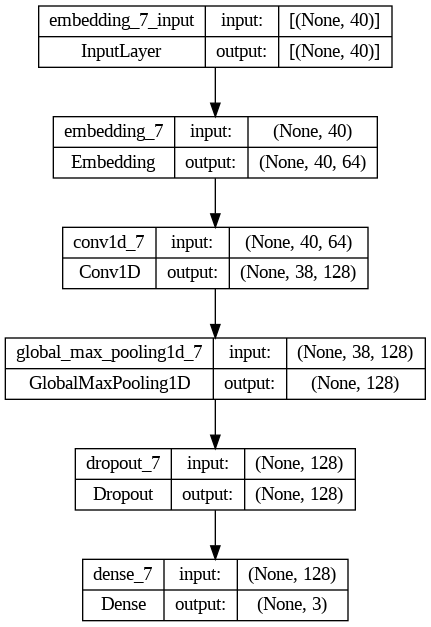

In [138]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)


lets train

In [139]:
epochs = 8
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(32),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(32),
                    verbose=1)

Epoch 1/8
19/19 [==============================] - 3s 57ms/step - loss: 1.4754 - categorical_accuracy: 0.5343 - val_loss: 1.2722 - val_categorical_accuracy: 0.5522
Epoch 2/8
19/19 [==============================] - 1s 36ms/step - loss: 1.1272 - categorical_accuracy: 0.5628 - val_loss: 1.0156 - val_categorical_accuracy: 0.5522
Epoch 3/8
19/19 [==============================] - 1s 32ms/step - loss: 0.9330 - categorical_accuracy: 0.5628 - val_loss: 0.9043 - val_categorical_accuracy: 0.5522
Epoch 4/8
19/19 [==============================] - 1s 32ms/step - loss: 0.8645 - categorical_accuracy: 0.6265 - val_loss: 0.8767 - val_categorical_accuracy: 0.6119
Epoch 5/8
19/19 [==============================] - 1s 33ms/step - loss: 0.8384 - categorical_accuracy: 0.6482 - val_loss: 0.8710 - val_categorical_accuracy: 0.5821
Epoch 6/8
19/19 [==============================] - 1s 33ms/step - loss: 0.7888 - categorical_accuracy: 0.7136 - val_loss: 0.8625 - val_categorical_accuracy: 0.5970
Epoch 7/8
19/19 

In [140]:
history.history

{'loss': [1.4754376411437988,
  1.1271830797195435,
  0.9329711198806763,
  0.8644745349884033,
  0.8383764624595642,
  0.7888455986976624,
  0.7504575252532959,
  0.6937466263771057],
 'categorical_accuracy': [0.5343383550643921,
  0.5628140568733215,
  0.5628140568733215,
  0.6264656782150269,
  0.6482412219047546,
  0.713567852973938,
  0.7906197905540466,
  0.8324958086013794],
 'val_loss': [1.2722374200820923,
  1.0156149864196777,
  0.9042823910713196,
  0.8766766786575317,
  0.8710077404975891,
  0.8625469207763672,
  0.8555536866188049,
  0.8519280552864075],
 'val_categorical_accuracy': [0.5522388219833374,
  0.5522388219833374,
  0.5522388219833374,
  0.611940324306488,
  0.5820895433425903,
  0.5970149040222168,
  0.6567164063453674,
  0.641791045665741]}

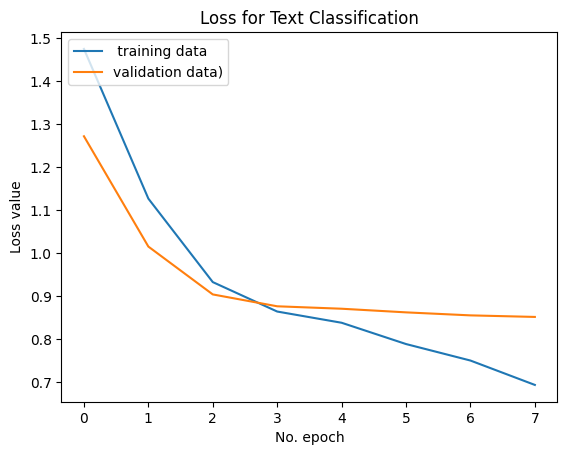

In [141]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data)')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

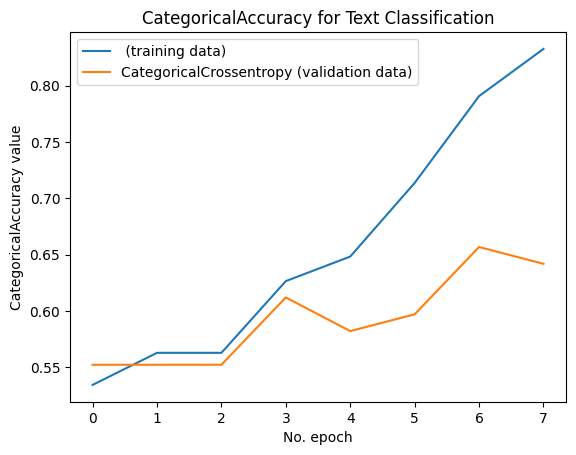

In [142]:
plt.plot(history.history['categorical_accuracy'], label=' (training data)')
plt.plot(history.history['val_categorical_accuracy'], label='CategoricalCrossentropy (validation data)')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [143]:
model.save('cnnmodel')
json_string = tokenizer.to_json()

In [144]:
import json
with open('tokenizer.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [145]:
new_model = tf.keras.models.load_model('cnnmodel')
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 40, 64)            1280064   
                                                                 
 conv1d_7 (Conv1D)           (None, 38, 128)           24704     
                                                                 
 global_max_pooling1d_7 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1305155 (4.98 MB)
Trainable params: 1305155 (4.98 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [146]:
with open('C:\\Users\\HOME\\Desktop\\New Project\\tokenizer.json') as json_file:
    json_string = json.load(json_file)
tokenizer1 = tf.keras.preprocessing.text.tokenizer_from_json(json_string)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\HOME\\Desktop\\New Project\\tokenizer.json'

In [147]:
print("Generate predictions for all samples")
predictions = new_model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Generate predictions for all samples
5/5 [==============================] - 0s 5ms/step
[[3.2578294  2.1818202  0.        ]
 [2.8255618  2.482756   0.        ]
 [2.3997433  2.7455776  0.        ]
 [2.3546665  2.875189   0.        ]
 [1.8390025  3.1138434  0.        ]
 [1.7917022  3.107385   0.        ]
 [1.8966964  3.0268009  0.        ]
 [2.1372526  2.8129766  0.        ]
 [2.164357   1.9629308  0.        ]
 [2.527112   2.91088    0.        ]
 [1.8992077  3.0491002  0.        ]
 [1.9985214  3.1280725  0.        ]
 [1.927329   3.0493233  0.        ]
 [2.6412575  2.2192008  0.        ]
 [2.7843304  2.1329353  0.        ]
 [2.6078293  2.3767335  0.        ]
 [2.5599163  2.464321   0.        ]
 [1.8872073  2.9510965  0.        ]
 [2.3779485  3.051541   0.        ]
 [1.7307976  3.1422274  0.        ]
 [2.509939   2.932554   0.        ]
 [2.7323267  2.7521455  0.        ]
 [3.2045743  2.2420511  0.        ]
 [3.2353966  2.2139351  0.        ]
 [2.6815994  2.1967509  0.        ]
 [1.9482635 

In [148]:
test_data['pred_sentiment']= predict_results


In [149]:
# labels = [1,0]

# print(classification_report(pr,ytest,labels=labels))

In [150]:
predict_results

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [151]:
y_test

,Unnamed: 0.2,Unnamed: 0,sno,DATE,HEADLINE,TICKER,COMPANY NAME,SECTOR,SUBSECTOR,SERIES,...,close,volume,adj close,avg High,avg low,avg open,avg close,avg volume,avg adj close,trend
0,0,0,14,2023-07-24,BASF reports #Q1 earnings\n\n- Net profit down...,BASF,BASF India Limited,Chemicals,Chemicals,EQ,...,2664.300049,2664.300049,145514,3142.210010,3171.810010,3105.050049,3152.239941,3145.898438,45907.4,bearish
1,1,1,15,2023-07-24,PNB Housing Finance reports #Q1 earnings\n\n- ...,PNB,Punjab National Bank,Banks - PSU,Banks - PSU,EQ,...,62.099998,62.099998,56162634,75.350000,76.730001,74.220000,75.329999,75.329999,94425801.8,bearish
2,2,2,18,2023-07-24,IDBI Bank reports Q1 earnings\n\n- Profit up 6...,IDBI,IDBI Bank Limited,Banks - PSU,Banks - PSU,EQ,...,57.900002,57.900002,16707700,69.260001,70.050000,68.600000,69.120000,69.120000,9556145.6,bearish
3,3,3,20,2023-07-24,SRF reports #Q1 numbers\n\n-Chemicals segment ...,SRF,SRF Limited,Diversified,Diversified,EQ,...,2144.350098,2137.418701,1884393,2677.100000,2697.679980,2638.230029,2661.220020,2652.618066,904254.8,bullish
4,4,4,37,2023-07-25,"ITC extends decline, down more than 3% after c...",ITC,ITC Limited,NaN,NaN,EQ,...,462.299988,455.608521,43534718,575.669995,582.850012,565.189996,573.520001,565.218719,27190665.4,bullish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,144,1668,2024-05-08,BSE reports #Q4 earnings\n\nCons net profit up...,BSE,BSE Limited,NaN,NaN,EQ,...,2819.399902,2819.399902,554365,3417.900000,3447.879980,3340.960010,3394.339941,3394.339941,1552141.0,bearish
145,145,145,1681,2024-05-09,IOB reports #Q4 earnings👇\n\n➡️Net profit up 2...,IOB,Indian Overseas Bank,Banks - PSU,Banks - PSU,EQ,...,61.150002,61.150002,19825867,78.660000,79.349998,76.080001,77.000002,77.000002,16476998.6,bullish
146,146,146,1689,2024-05-12,TCI Express reports #Q4 earnings👇\n\n➡️Net pro...,TCI,Transport Corporation of India Limited,Transport,Transport,EQ,...,872.750000,872.750000,20390,1051.290002,1066.240002,1029.950000,1047.440002,1047.440002,78638.0,bullish
147,147,147,1697,2024-05-12,ITDC Q4\n\n--Net Profit Up 68% At Rs 32.4 Cr V...,ITDC,India Tourism Development Corporation Limited,NaN,NaN,EQ,...,614.099976,614.099976,30644,769.120007,776.810010,745.410010,754.700012,754.700012,40998.0,bullish


In [152]:
y_test=pd.read_csv('final_dataset.csv')

In [153]:
y=y_test.trend.values

In [154]:
len(predict_results)

149

In [155]:
pr=predict_results
len(pr)

149

In [156]:
len(y)

149

In [157]:
ytest=[]
for i in range(len(pr)):
    if(y[i]=='bearish'):
        ytest.append(0)
    else:
        ytest.append(1)


In [158]:
res=0
for i in range(len(pr)):
    if(ytest[i]==pr[i]):
        res=res+1



In [159]:
res

123

In [160]:
capable = res/len(pr)
print ("No. of dataset can be predicted : ",capable)

No. of dataset can be predicted :  0.825503355704698


In [161]:
com=pd.read_csv('final_dataset.csv')

In [162]:
compound=com.compound_score.values

In [163]:
com_pre=[]
for i in range(len(compound)):
    if(compound[i]<0):
        com_pre.append(0)
    elif(compound[i]>0):
        com_pre.append(1)
    else:
        com_pre.append(-1)


In [164]:
total=0
resu=0
actual=0
for i in range(len(com_pre)):
    if(com_pre[i]==pr[i] and pr[i]==ytest[i]):
        resu=resu+1
        total=total+1
    elif(com_pre[i]==pr[i] and pr[i]!=ytest[i]):
        total=total+1
    # elif(com_pre[i]==pr[i] and com_pre[i]!=-1):
    #     total=total+1



In [167]:
total

54

In [166]:
print ("Accuray over the predicted data : ",resu/total)

Accuray over the predicted data :  0.8518518518518519


In [84]:
results = []
results.append(pr)
results.append(com_pre)
results.append(pred)
results.append(ytest)

NameError: name 'pred' is not defined

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(test_data.HEADLINE.values,columns=['Headlines'])

In [ ]:
df['Neural Network prediction']=pr
df['Emperical Weight prediction']=com_pre
df['Predicted trend']=pr
df['Actual trend']=ytest

In [ ]:
df.head(50)

,Headlines,Neural Network prediction,Emperical Weight prediction,Predicted trend,Actual trend
0,government has far transferred lakh through di...,1,1,1,0
1,prime minister narendra modi launches digital ...,0,-1,0,0
2,irdai increases penalty max life insurance max...,0,0,0,1
3,gtpl hathway reports earnings consolidated â–¶...,0,1,0,0
4,butterfly gandhimathi appliances reports earni...,0,1,0,0
5,kesoram industries reports earnings â–¶ï¸net ...,0,0,0,0
6,avenue supermarts reports earnings â–¶ï¸net p...,0,1,0,0
7,ahluwalia contracts india secures order worth ...,0,1,0,0
8,ganesh housing corporation reports earnings co...,1,1,1,1
9,tvs motors updated that acquisition stake tran...,1,-1,1,1


In [ ]:
arr[0][0]

'government has far transferred lakh through direct benefit transfer another instalment kisan will transferred tomorrow says prime minister narendramodi'

In [ ]:
arr=np.array(df)

In [ ]:
for i in range(len(arr)):
    if(arr[0][0]==)

,Headlines,Neural Network prediction,Emperical Weight prediction
0,government has far transferred lakh through di...,1,1
1,prime minister narendra modi launches digital ...,0,-1
2,irdai increases penalty max life insurance max...,0,0
3,gtpl hathway reports earnings consolidated â–¶...,0,1
4,butterfly gandhimathi appliances reports earni...,0,1


In [ ]:
df.to_csv('resultsec.csv')